# Lab 4: Maximum Likelihood Estimate (MLE)

### Introduction

In this lab session we shall have a look at how to use the *Maximum Likelihood Estimate (MLE)* method to estimate the parameters of some model, given some observations $D$.

<font color="red">NOTE: </font>In the notation $\mathcal{N} (\mu, \sigma^2)$ $\mu$ refers to the mean and $\sigma^2$  the variance, not the standard deviation. The standard deviation is $\sigma = \sqrt {\sigma^2}$, i.e. for $\mathcal{N}(0.5, 0.25)$, the standard deviation is $\sigma = 0.5$.

As usual, let's import the libraries before we start by running the cell below.

In [1]:
from __future__ import print_function # to avoid issues between Python 2 and 3 printing

import numpy as np
from scipy import stats
# Necessary to import Axes3D to use `plt.subplots(subplot_kw={'projection': '3d'})`
# as this internally sets up matplotlib for 3D projection, without this import you'll 
# get an error.
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# show matplotlib figures inline
%matplotlib inline

In [2]:
# By default we set figures to be 7"x4" on a 110 dots per inch (DPI) screen 
# (adjust DPI if you have a high res screen!)
plt.rc('figure', figsize=(7, 4), dpi=110)
plt.rc('font', size=10)

## 1. MLE recipe

Let's suppose you're given $n$ one dimensional data points $D = \{d_0, d_1, ...,  d_{n-1} \}$ which you believe follow a normal distribution. In this case, your model has two parameters: $\mu$ and $\sigma^2$.

Given your data $D$, you wish to find the most likely parameters of the normal distribution.
Let's assume the standard deviation ($\sigma$) is 0.5, now estimate the parameter $\mu$ of the model (the mean of the normal distribution representing your data). 

Use the Maximum Likelihood Estimate (MLE) formula to show that $\mu_{ML} = \frac{1}{n}\sum_i d_i$.

**Hint**: assuming the data points are independent, we have 

$$p(D|\mu) = \prod_i p(d_i | \mu) = \prod_i \mathcal{N}(d_i|\mu, \sigma^2)$$

Additionally, since this is a convex function, we can analytically find the stationary point that maximises the function where $\frac{dp(D|\mu)}{d\mu} = 0$.

**Note:** This should be done on paper (and ideally typed up in $\LaTeX$ in the cell below), not using Python.

### Answer

Write here your answer using latex notation. Alternatively, write your solution on paper and show it to a TA.

$$
\begin{aligned}
\mathcal{L} &= \ln \left[ \prod_{i} p(d_i | \mu) \right] & \\
            &= \sum_{i} \ln \left[ p(d_i | \mu) \right] &= \sum_{i} \ln \left[ \mathcal{N}(d_i | \mu, \sigma^2) \right] \\
            &= \sum_i \ln \left[ \frac{1}{\sigma \sqrt{2 \pi}} \exp \left( {-\frac{1}{2} {\left( \frac{d_i-\mu}{\sigma} \right)}^2 } \right) \right] & \\ 
            \\
            \text{therefore} \\
            \\
\frac{\partial\mathcal{L}}{\partial\mu} 
            &= \frac{\partial}{\partial\mu} \sum_i \ln \left[ \frac{1}{\sigma \sqrt{2 \pi}} \exp \left( {-\frac{1}{2} {\left( \frac{d_i-\mu}{\sigma} \right)}^2 } \right) \right] 
            % &= \sum_i  \frac{\partial}{\partial\mu} \ln \left[ \frac{1}{\sigma \sqrt{2 \pi}} \exp \left( {-\frac{1}{2} {\left( \frac{d_i-\mu}{\sigma} \right)}^2 } \right) \right] \\
            \\
            \text{Evaluating }\ln \text{ yields: } 
            \\
            &=  \frac{\partial}{\partial\mu} \sum_i   \left( \ln \left[ \frac{1}{\sigma \sqrt{2 \pi}} \right] \right)  - \frac{\partial}{\partial\mu} \sum_i   \frac{1}{2} {\left( \frac{d_i-\mu}{\sigma} \right)}^2   \\
            \\
            \text{Constant term can be ignored, factor out }\sigma^2 \text{:} \\
            \\
            &= - \frac{\partial}{\partial\mu} \sum_i   \frac{1}{2 \sigma^2} {\left( d_i-\mu \right)}^2  \\
            \\
            \text{Applying chain rule:} \\
            \\
            &= \sum_i \frac{d_i-\mu}{\sigma^2} \\
            \\
            \text{Finally, }\hat \mu_{ML}\text{is found by solving:} \\
            \\
\frac{\partial\mathcal{L}}{\partial\mu} 
            &= 0 \\
0           &= \sum_i \frac{d_i-\hat\mu}{\sigma^2} &= \sum_i d_i-\hat\mu \\
\sum_i \hat \mu  
            &= \sum_i d_i \\
\hat\mu     &= \frac{1}{n} \sum_i d_i
\end{aligned}
$$

## 2. MLE with Python

We know want you to write a simple program that calculates $\mu_{\text{ML}}$ using Python.

Let's now load the data from the file `data1.dat` and let's plot the histogram of the data.

(array([2., 1., 5., 9., 8., 8., 8., 4., 2., 3.]),
 array([-0.34415 , -0.144065,  0.05602 ,  0.256105,  0.45619 ,  0.656275,
         0.85636 ,  1.056445,  1.25653 ,  1.456615,  1.6567  ]),
 <BarContainer object of 10 artists>)

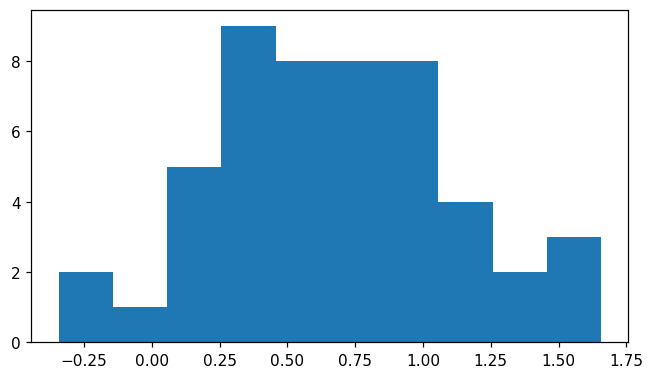

In [3]:
# write your code here
sigma = np.array([0.5])
sigma2 = sigma**2

sanitise = lambda x: float(str.strip(x))

def get_data(path):
    with open(path) as file:
        raw = file.readlines()
        data = np.array(list(map(sanitise, raw)), dtype=float).reshape(len(raw), 1)
        return data

data = get_data("data1.dat")

fig, ax = plt.subplots()
ax.hist(data)

You should now see a histogram approximating a normal distribution. In fact, `data1.data` contains the observations $D$ we talked about above when deriving $\mu_\text{ML}$, which we said we believe follows a normal distribution. 

Write a function `compute_likelihood(D, mu)` that takes a value of $\mu$ and computes $p(D | \mu)$ for the data in `data1.dat`, assuming $\sigma=0.5$.

You may use NumPy's function `np.prod` for the calculation.

In [4]:
# write your code here
def compute_likelihood(D, mu):
    return np.prod(stats.multivariate_normal.pdf(D, mu, sigma2))

Write a function `loop_likelihood(D)` that calls `compute_likelihood` for each value of $\mu \in \{0.00, 0.01, 0.02, \ldots , 1.00\}$, storing *both* the value of $\mu$ and the corresponding obtained likelihood in a 2D array so that the first column contains the value $\mu$ and the second the likelihood $p(D|\mu)$ .

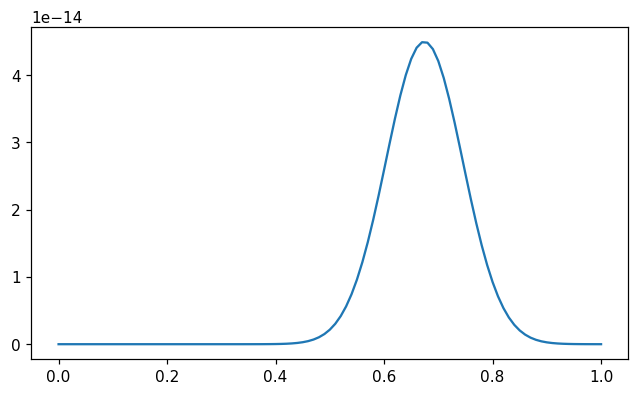

In [5]:
# write your code here
def loop_likelihood(D):
    interval = 100 + 1 # 0 to 1.00 (step 0.01) inclusive
    mus = np.array(np.linspace(0,1, interval)).reshape(interval,1)
    likelihood_given_d = lambda m: compute_likelihood(D, m)
    likelihoods = np.array(list(map(likelihood_given_d, mus))).reshape(interval,1)
    return np.concatenate([mus, likelihoods], axis=1)


ll = loop_likelihood(data)
mus, likelihoods = ll[:,0], ll[:,1]

fig, ax = plt.subplots()
ax.plot(mus, likelihoods)

### Questions:

- What is the value of the maximum likelihood $\text{ML} = \max p(D|\mu)$ ? 

- What is $\mu_{\text{ML}} = arg\,max_\mu \, p(D|\mu)$? 

Make sure you understand the difference between the two.

In [6]:
# write your code here
ML = likelihoods.max()
mu_ML = mus[list(likelihoods).index(ML)]

ML, mu_ML

(4.491192371239735e-14, 0.67)

### Visual interpretation

Look at the obtained $\mu_{\text{ML}}$ and at the previously plotted histogram. Can you see any relationship between the obtained value and the histogram?

Let's now plot $\mu$ against $p(D|\mu)$, using the $\mu$ values you used to compute the likelihoods. Plot also a vertical line located at $\mu_{\text{ML}}$. Where does this line lie? Is it a meaningful position?

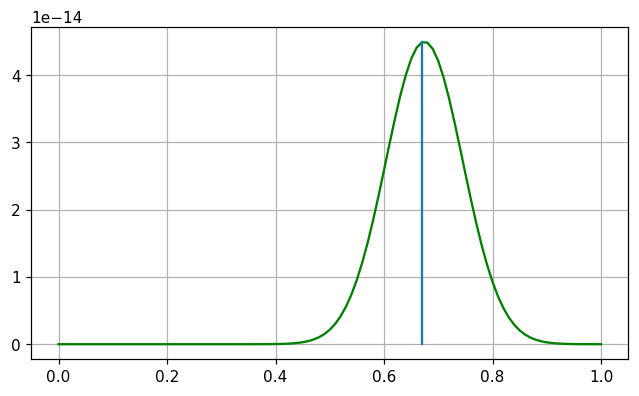

In [7]:
# write your code here
fig, ax = plt.subplots()
ax.grid()
ax.plot(mus, likelihoods, color="green")

y = np.linspace(0,ML,11)
x = np.ones((11,1)) * mu_ML
ax.plot(x, y)

### Comparison with MLE recipe

Now implement the MLE recipe for $\mu_\text{ML}$ you solved at the beginning of this sheet to find the value of $\mu_{ML}$ (note that this should be just one line of code!).

Compare this value with that obtained previously. Do the values match? 

In [8]:
# write your code here
mu_MLcalc = np.mean(data)
mu_MLcalc

0.6742339399999999

# 3. Posterior probability

Let's suppose now we have some prior knowledge regarding our parameter $\mu$. More precisely, our belief is that the probability density function (pdf) $p(\mu)$ modelling our parameter is also given by a normal distribution.

Assuming that $\mu \sim \mathcal{N}(0.5,0.01)$, write two functions, `compute_posterior(D, mu)` and `loop_posterior(D)`, to find $\mu_{\text{MAP}} = \arg \max_{\mu} p(D|\mu)p(\mu)$.

In [9]:
# write your code here
muMu = np.array([0.5])
muSigma = np.array([0.1])
muSigma2 = np.square(muSigma)

def compute_posterior(D, mu):
    return compute_likelihood(D, mu) * stats.multivariate_normal.pdf(mu, muMu, muSigma2)

def loop_posterior(D):
    interval = 100 + 1 # 0 to 1.00 (step 0.01) inclusive
    mus = np.array(np.linspace(0,1, interval)).reshape(interval,1)
    get_posterior = lambda m: compute_posterior(D, m)
    posteriors = np.array(list(map(get_posterior, mus))).reshape(interval,1)
    return np.concatenate([ mus, posteriors ], axis=1)

lps = loop_posterior(data)
muMus, posteriors = lps[:,0], lps[:,1]

### Visual interpretation


Now plot $\mu$ against both $p(D|\mu)$ and $p(D|\mu)p(\mu)$ similar to the graph below.
![MLE](mle.png)

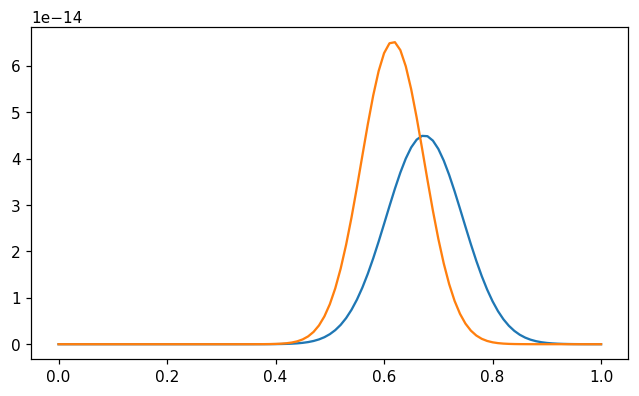

In [10]:
# write your code here
fig, ax = plt.subplots()
ax.plot(mus, likelihoods)
ax.plot(muMus, posteriors)

Repeat now the above calculations for `data2.dat` and `data3.dat`. 

For both files, plot $\mu$ against both $p(D|\mu)$ and $p(D|\mu)p(\mu)$.

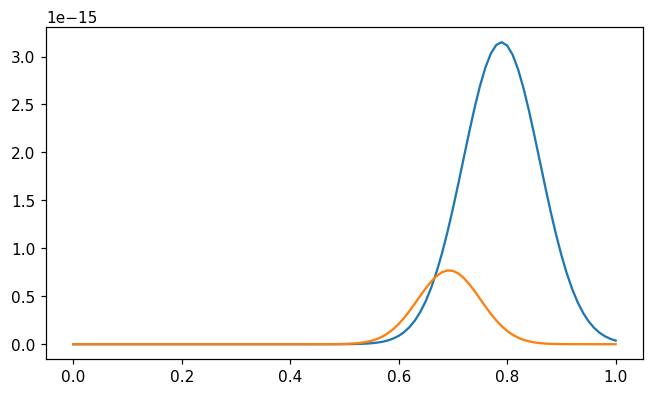

In [11]:
# write your code here
data2 = get_data("data2.dat")
# data3 = get_data("data3.dat")

ll2s = loop_likelihood(data2)
lp2s = loop_posterior(data2)
mus2, likelihoods2 = ll2s[:,0], ll2s[:,1] 
posteriors2 = lp2s[:,1]

fig, ax = plt.subplots()
ax.plot(mus, likelihoods2)
ax.plot(mus2, posteriors2)

# lp3s = loop_posterior(data3)

### Question

Observe the results obtained on `data2` and `data3`. What can we tell by looking at the figures you plotted above?

### CORRECT ANSWER

When the likelihood is further from the suggested prior, we are less confident about our measurements, and thus we observe a larger distance between the two distributions' mean.

## EXTRA 1

Until now, you assumed that our data was generated from a normal distribution with $\sigma^2 = 0.25$. 

Remove this assumption and estimate $\theta_{\text{MAP}} = [\mu_{\text{MAP}}, \sigma_{\text{MAP}}]$ experimentally by looping through different values of $\mu$ and $\sigma$. 

Assume the pdf $p(\sigma)$ is given by $\mathcal{N}(0.5, 0.16)$.

You may need to use `np.nanargmax` instead of `np.argmax`.

In [12]:
# write your code here 
mu_dist = lambda m: stats.multivariate_normal.pdf(m, 0.5, 0.01)
s2_dist = lambda s2: stats.multivariate_normal.pdf(s2, 0.5, 0.16)

samples = 100 + 1 # 0.00 to 1.00 

def compute_mv_likelihood(D, mu, s2):
    return np.array([np.prod(stats.multivariate_normal.pdf(D, mu, s2))])

def loop_mv_likelihood(D):
    mus_test = np.array(np.linspace(0,1,samples)).reshape(samples,1)
    s2s_test = np.array(np.linspace(1/(samples-1),1,samples-1)).reshape(samples-1,1) # sigma cannot be zero
    
    mu_s2_test = np.array([np.concatenate([mu, s2]) for mu in mus_test for s2 in s2s_test])
    
    def get_mv_likelihood(mu_s2):
        return compute_mv_likelihood(D, mu_s2[0], mu_s2[1])
    
    mv_likelihoods = np.array(list(map(get_mv_likelihood, mu_s2_test)))
    
    return np.concatenate([mu_s2_test, mv_likelihoods], axis=1)

def compute_mv_posterior(D, mu, s2):
    return np.array([np.prod(compute_mv_likelihood(D, mu, s2)) * mu_dist(mu) * s2_dist(s2)])
    
def loop_mv_posterior(D):
    mus_test = np.array(np.linspace(0,1,samples)).reshape(samples,1)
    s2s_test = np.array(np.linspace(1/(samples-1),1, samples-1)).reshape(samples-1,1)
    
    mu_s2_test = np.array([np.concatenate([mu, s2]) for mu in mus_test for s2 in s2s_test])
    
    def get_mv_posterior(mu_s2):
        return compute_mv_posterior(D, mu_s2[0], mu_s2[1])
    
    mv_posteriors = np.array(list(map(get_mv_posterior, mu_s2_test)))
    
    return np.concatenate([mu_s2_test, mv_posteriors], axis=1)
    
lls = loop_mv_likelihood(data)
lps = loop_mv_posterior(data)
mvmu, mvs2, mvlls = lls.T
mvlps = lps.T[2]

mvllMaxKey = np.nanargmax(lls)
mvlpMaxKey = np.nanargmax(lps)
print(lls[mvllMaxKey])
print(lps[mvlpMaxKey])

[2.0000000e-02 9.9000000e-01 2.1291348e-27]
[2.0000000e-02 9.9000000e-01 3.9722291e-32]


## EXTRA 2

Plot ($\mu$, $\sigma$) against $p(D|\theta)p(\theta)$ similar to the mesh graph below (use the function `Axes3D.plot_surface`).
![MLE mesh](mle2.png)

[[0.00000000e+000 9.60000000e-001 1.40761445e-027]
 [0.00000000e+000 9.70000000e-001 1.29313465e-027]
 [0.00000000e+000 9.80000000e-001 1.18689812e-027]
 [0.00000000e+000 9.90000000e-001 1.08846922e-027]
 [0.00000000e+000 1.00000000e+000 9.97410858e-028]
 [1.00000000e-002 1.00000000e-002 0.00000000e+000]
 [1.00000000e-002 2.00000000e-002 2.96439388e-323]
 [1.00000000e-002 3.00000000e-002 1.18551958e-212]
 [1.00000000e-002 4.00000000e-002 2.89288462e-158]
 [1.00000000e-002 5.00000000e-002 3.50844980e-126]
 [1.00000000e-002 6.00000000e-002 3.71484275e-105]]


Text(0.5, 0, 'P(D|mu,sigma)')

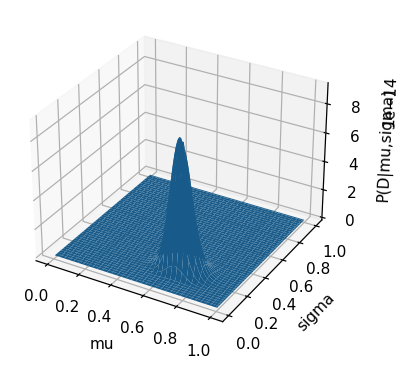

In [17]:
# write your code here
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
X, Y = np.meshgrid(np.linspace(0, 1, samples), np.linspace(1/(samples-1), 1, samples-1))
Z = np.ndarray(shape=(samples-1, samples))

print(lls[95:106])

for i in range(samples * (samples-1)):
    muI = i//(samples-1)
    s2I = i%(samples-1)
    Z[s2I,muI] = lls[muI*(samples-1) + s2I][2]
    
ax.plot_surface(X, Y, Z)
ax.set_xlabel("mu")
ax.set_ylabel("sigma")
ax.set_zlabel("P(D|mu,sigma)")
    